# Dependencies

In [4]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

## Importing as shown in the assignment description

### Occupancy preparation

In [6]:
# Importing the occupancy datasets
occu_train = np.loadtxt("./OccupancyTrain.csv", delimiter=",")
occu_test = np.loadtxt("./OccupancyTest.csv", delimiter=",")

In [7]:
# Seperating occupancy columns
# X,y train
X_occu_train = occu_train[:,:-1]
y_occu_train = occu_train[:,-1]

# X,y test
X_occu_test = occu_test[:,:-1]
y_occu_test = occu_test[:,-1]

### Weed preparation

In [8]:
# Importing the weed dataset
weed_train = np.loadtxt("./IDSWeedCropTrain.csv", delimiter=",")
weed_test = np.loadtxt("./IDSWeedCropTest.csv", delimiter=",")

In [9]:
# Seperating weed columns
# X,y train
X_weed_train = weed_train[:,:-1]
y_weed_train = weed_train[:,-1]

# X,y test
X_weed_test = weed_test[:,:-1]
y_weed_test = weed_test[:,-1]

In [10]:
def standardize(data):
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    standardized_data = (data - data_mean) / data_std
    return standardized_data

# Exercise 1

In [35]:
# Data standardization
occupancy_standardized = standardize(X_occu_train)
weed_standardized = standardize(X_weed_train)

In [41]:
'''
Implementation of PCA function
'''
def PCA(data):    
    # Find covariance matrix
    cov_matrix = np.cov(data.T)
    # Find eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    # Sorting in monotomically decreasing order
    sorting_idxs = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorting_idxs]
    eigenvalues = eigenvalues[sorting_idxs]

    # Return statement
    return eigenvectors, eigenvalues

([<matplotlib.axis.XTick at 0x1778bcd30>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

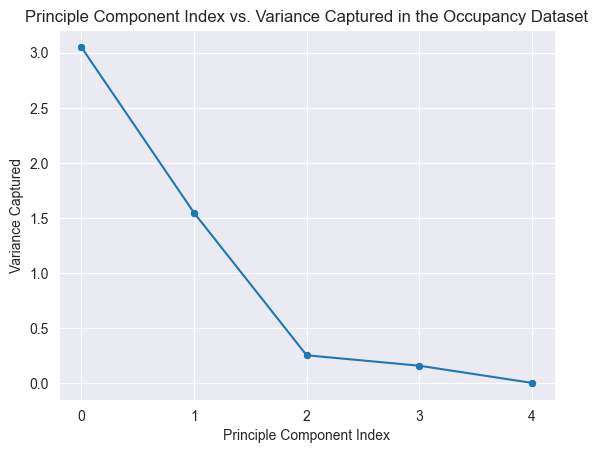

In [42]:
'''
Occupancy dataset
Function run and visualization
'''
# Running the PCA function
occu_eigenvectors, occu_variance = PCA(occupancy_standardized)

# Plotting variance vs pc index
sns.set_style("darkgrid")
sns.lineplot(x=range(len(occu_eigenvectors)), y=occu_variance)
sns.scatterplot(x=range(len(occu_eigenvectors)), y=occu_variance)
plt.grid(True)
plt.title("Principle Component Index vs. Variance Captured in the Occupancy Dataset")
plt.xlabel("Principle Component Index")
plt.ylabel("Variance Captured")
plt.xticks(range(len(occu_eigenvectors)))

([<matplotlib.axis.XTick at 0x1773a0f40>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

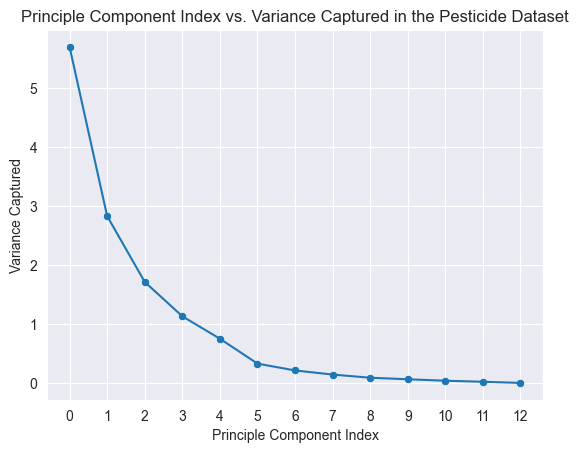

In [43]:
'''
Pesticide dataset
Function run and visualization
'''
# Running the PCA function
weed_eigenvectors, weed_variance = PCA(weed_standardized)

# Plotting variance vs. pc index
sns.set_style("darkgrid")
sns.lineplot(x=range(len(weed_eigenvectors)), y=weed_variance)
sns.scatterplot(x=range(len(weed_eigenvectors)), y=weed_variance)
plt.grid(True)
plt.title("Principle Component Index vs. Variance Captured in the Pesticide Dataset")
plt.xlabel("Principle Component Index")
plt.ylabel("Variance Captured")
plt.xticks(range(len(weed_eigenvectors)))

([<matplotlib.axis.XTick at 0x177bdba90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

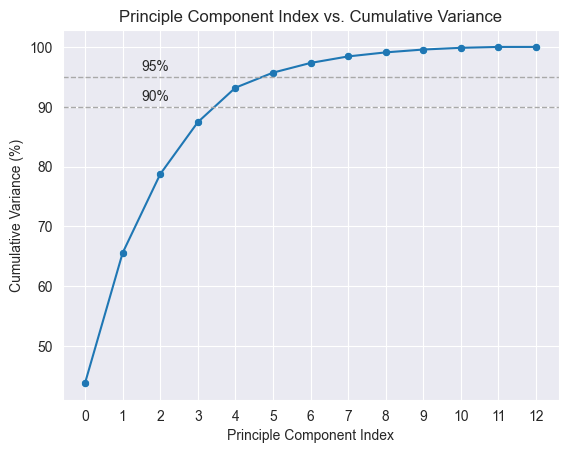

In [48]:
# Cumulative variance
explained_variance = weed_variance / np.sum(weed_variance)
weed_cumulative_variance = np.cumsum(explained_variance) / np.sum(explained_variance)

# Plotting cumulative variance vs. pc index
sns.set_style("darkgrid")
sns.lineplot(x=range(len(weed_eigenvectors)), y=weed_cumulative_variance*100)
sns.scatterplot(x=range(len(weed_eigenvectors)), y=weed_cumulative_variance*100)
plt.grid(True)
plt.title("Principle Component Index vs. Cumulative Variance")
plt.xlabel("Principle Component Index")
plt.ylabel("Cumulative Variance (%)")
plt.axhline(y=90, color="darkgray", linestyle="--", linewidth=1)
plt.axhline(y=95, color="darkgray", linestyle="--", linewidth=1)
plt.text(x=1.5, y=91, s="90%")
plt.text(x=1.5, y=96, s="95%")
plt.xticks(range(len(weed_eigenvectors)))


# Exercise 2

In [49]:
def projection(projection_data):
    eigenvectors, _ = PCA(projection_data)
    projection_eigenvectors = eigenvectors[:, :2]
    projected_data = np.dot(projection_data, projection_eigenvectors)

    # Create a scatter plot of the projected data
    sns.set_style("darkgrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=projected_data[:, 0],
        y=projected_data[:, 1],
        edgecolor="k"
    )
    if len(eigenvectors) > 10:
        plt.title('2D Projection of pesticide data')
    else:
        plt.title('2D Projection of occupancy data')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

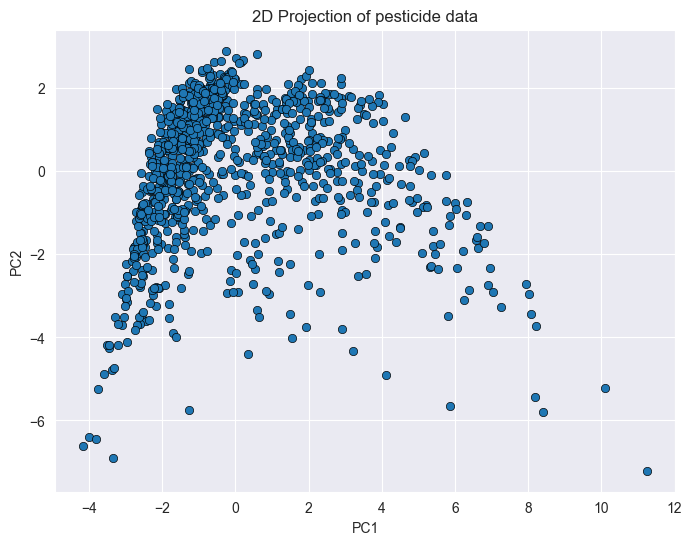

In [50]:
projection(weed_standardized)

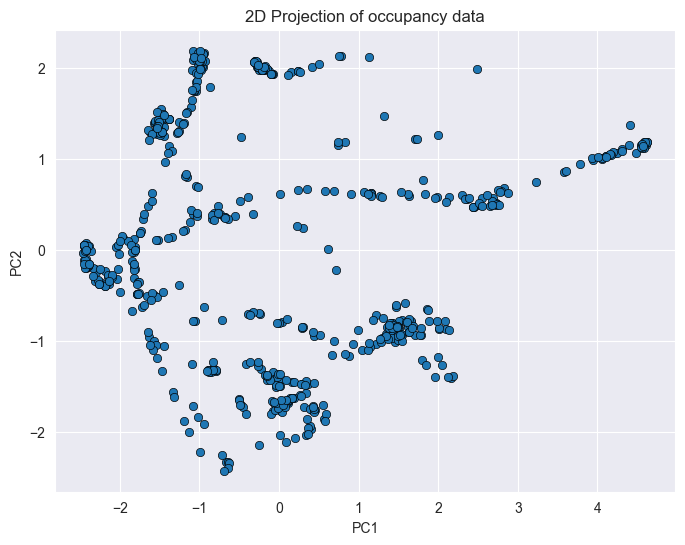

In [51]:
projection(occupancy_standardized)

# Exercise 4

In [52]:
# Original function
def f(x):
    f = np.exp(-x/2) + 10 * x ** 2
    return f

In [53]:
# Derivation of f-prime
def ff(x):
    f_prime = 20*x - (np.exp(-x/2) / 2)
    return f_prime

In [55]:
def gradient_descent(learning_rate, threshold=10**(-10), max_iterations=10000):
    # Starting point
    x = 1
    for iteration in range(max_iterations):
        # Compute gradient and descent
        gradient = ff(x)
        x = x - learning_rate * gradient
        # Check convergence
        if abs(gradient) < threshold:
            return iteration, f(x)
    return max_iterations, f(x)

In [56]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
result_dict = {}
for learning_rate in learning_rates:
    iteration, final_gradient = gradient_descent(learning_rate=learning_rate)
    result_dict[learning_rate] = (iteration, final_gradient)
    print(f"\nLearning rate: {learning_rate}")
    print(f"Iteration converged: {iteration}")
    print(f"Final value: {final_gradient}")
result_dict


Learning rate: 0.1
Iteration converged: 10000
Final value: nan

Learning rate: 0.01
Iteration converged: 115
Final value: 0.9938268478110839

Learning rate: 0.001
Iteration converged: 1272
Final value: 0.993826847811084

Learning rate: 0.0001
Iteration converged: 10000
Final value: 0.993826847811084


/var/folders/3p/j_x44c2s1g9cmby7tjycr9vh0000gn/T/ipykernel_4328/2519117502.py:3: RuntimeWarning: overflow encountered in exp
  f_prime = 20*x - (np.exp(-x/2) / 2)
/var/folders/3p/j_x44c2s1g9cmby7tjycr9vh0000gn/T/ipykernel_4328/1511355187.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  x = x - learning_rate * gradient


{0.1: (10000, nan),
 0.01: (115, 0.9938268478110839),
 0.001: (1272, 0.993826847811084),
 0.0001: (10000, 0.993826847811084)}

In [66]:
def gradient_visualization(learning_rate, max_iter=3):
    # Plot range and init values
    x = np.linspace(-1.3, 1.35, 100)
    y = f(x)
    x_start = 1
    y_start = f(x_start)

    # Collected plotting values
    x_vals = [x_start]
    y_vals = [y_start]

    # Slope and intercept
    slope = ff(x_start)
    intercept = f(x_start) - slope * x_start

    # Plotting function
    sns.set_style("darkgrid")
    sns.lineplot(x=x, y=y)

    # Visualization loop
    for i in range(max_iter + 1):
        # Update x
        x_new = x_vals[i] - learning_rate * ff(x_vals[i])
        x_vals.append(x_new)
        y_vals.append(f(x_new))
        
        # Plot tangent
        sns.lineplot(x=x, y=slope*x+intercept, linewidth=0.5)
        plt.ylim((0, 20))

        if i > max_iter:
            return

        # Update slope and intercept
        slope = ff(x_new)
        intercept = f(x_new) - slope * x_new
    
    # Plot final values as points
    sns.scatterplot(x=x_vals[:-1], y=y_vals[:-1])
    plt.title(f"Tangent lines and gradient descent steps for learning rate: {str(learning_rate)}")

    print(x_vals)
    print(y_vals)

    # Construct arrows (gradient descent sctep direction
    for i in range(len(x_vals) - 2):
        arrow_start = (x_vals[i], y_vals[i])
        arrow_end = (x_vals[i+1], y_vals[i+1])
        # Make arrow
        plt.annotate("", xy=arrow_end, xytext=arrow_start, arrowprops=dict(color='red', arrowstyle="->"))



[1, -0.9696734670143685, 1.0508689598709988, -1.021304039808151, 1.1046229074086813]
[10.606530659712634, 11.026576183449258, 11.63455410946051, 12.0969967692951, 12.77753543340629]


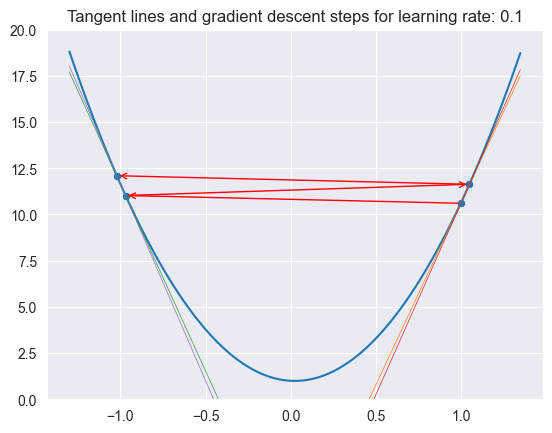

In [67]:
gradient_visualization(learning_rate=learning_rates[0])

[1, 0.8030326532985632, 0.6457726445994127, 0.5202383964731739, 0.42004551559499737]
[10.606530659712634, 7.11791881474975, 4.894279243857944, 3.4774395749414317, 2.5749481507826397]


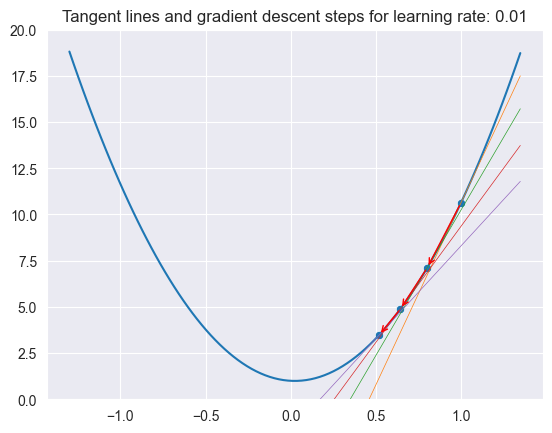

In [71]:
gradient_visualization(learning_rate=learning_rates[1])

[1, 0.9803032653298563, 0.9610034667767863, 0.9420926339439457, 0.9235629555949679]
[10.606530659712634, 10.222478427217988, 9.85374963696043, 9.499733969116742, 9.159845358327892]


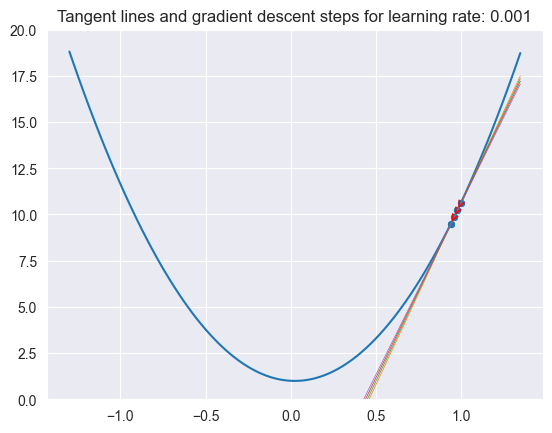

In [69]:
gradient_visualization(learning_rate=learning_rates[2])

[1, 0.9980303265329856, 0.9960646222943007, 0.9941028793146263, 0.9921450896405544]
[10.606530659712634, 10.567773614416351, 10.52917261614659, 10.490727037763316, 10.452436254641094]


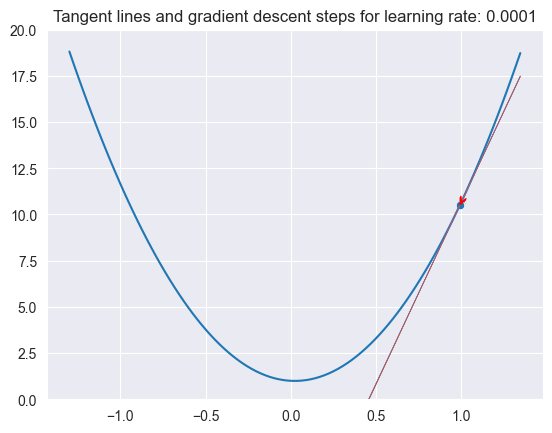

In [70]:
gradient_visualization(learning_rate=learning_rates[3])

In [72]:
def gradient_visualization_ten_iterations(learning_rate, max_iter=10):
    # Plot range and init values
    x = np.linspace(-1.3, 1.35, 500)
    y = f(x)
    x_start = 1
    y_start = f(x_start)

    # Collected plotting values
    x_vals = [x_start]
    y_vals = [y_start]

    # Slope and intercept
    slope = ff(x_start)

    # Plotting function
    sns.set_style("darkgrid")
    sns.lineplot(x=x, y=y)
    plt.ylim((0, 20))

    # Visualization loop
    for i in range(max_iter + 1):
        # Update x
        x_new = x_vals[i] - learning_rate * ff(x_vals[i])
        x_vals.append(x_new)
        y_vals.append(f(x_new))

        if i > max_iter:
            return

        # Update slope and intercept
        slope = ff(x_new)
    
    # Plot final values as points
    sns.scatterplot(x=x_vals[:-1], y=y_vals[:-1])
    plt.title(f"Gradient descent steps for learning rate: {str(learning_rate)}")


    print(x_vals)
    print(y_vals)

    # Construct arrows (gradient descent sctep direction
    for i in range(len(x_vals) - 2):
        arrow_start = (x_vals[i], y_vals[i])
        arrow_end = (x_vals[i+1], y_vals[i+1])
        # Make arrow
        plt.annotate("", xy=arrow_end, xytext=arrow_start, arrowprops=dict(color='red', arrowstyle="->"))

[1, -0.9696734670143685, 1.0508689598709988, -1.021304039808151, 1.1046229074086813, -1.075842019524371, 1.1614641698525972, -1.1334897386819633, 1.2216157621396404, -1.194470157966627, 1.2853245451799238, -1.2590300204368001]
[10.606530659712634, 11.026576183449258, 11.63455410946051, 12.0969967692951, 12.77753543340629, 13.286803516307286, 14.0494788019265, 14.610510346126592, 15.466362786540412, 16.084677326994118, 17.04648235928226, 17.728266101715946]


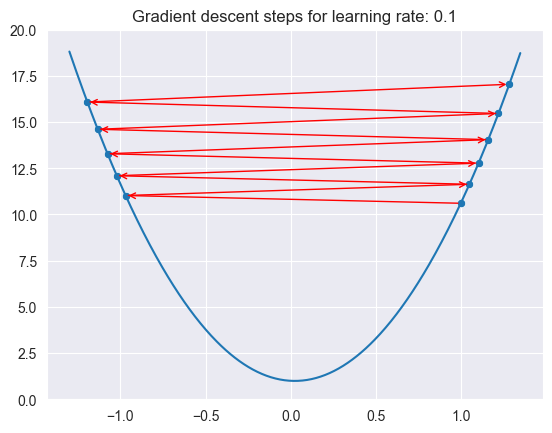

In [73]:
gradient_visualization_ten_iterations(learning_rate=learning_rates[0])

[1, 0.8030326532985632, 0.6457726445994127, 0.5202383964731739, 0.42004551559499737, 0.34008924147133773, 0.2762895290395275, 0.22538648621506846, 0.18477631238337455, 0.15237980580163063, 0.12653704573222507, 0.1059230934845024]
[10.606530659712634, 7.11791881474975, 4.894279243857944, 3.4774395749414317, 2.5749481507826397, 2.000234094136968, 1.6343316352581256, 1.4014153639477116, 1.253174035166185, 1.158836270345541, 1.0988076191708618, 1.0606134988177998]


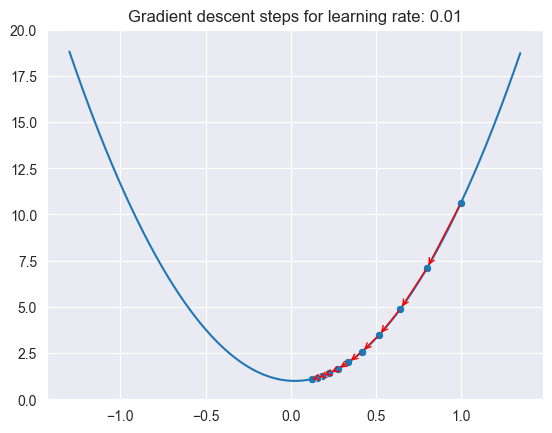

In [74]:
gradient_visualization_ten_iterations(learning_rate=learning_rates[1])

[1, 0.9803032653298563, 0.9610034667767863, 0.9420926339439457, 0.9235629555949679, 0.9054067764974959, 0.8876165943290775, 0.8701850566441734, 0.8531049579010576, 0.8363692365474101, 0.8199709721634348, 0.803903382661352]
[10.606530659712634, 10.222478427217988, 9.85374963696043, 9.499733969116742, 9.159845358327892, 8.833521032338735, 8.520220588638516, 8.219425107603367, 7.930636300701034, 7.653375692374808, 7.387183834278203, 7.131619550584237]


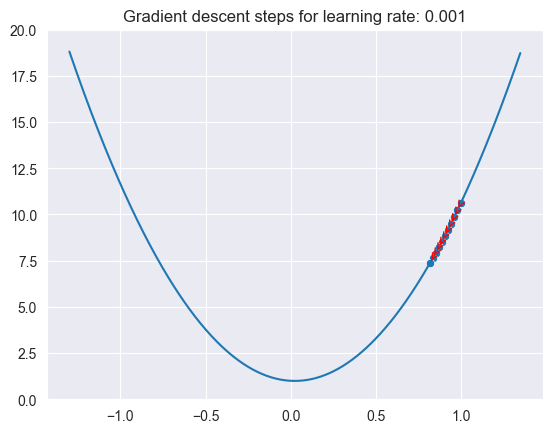

In [75]:
gradient_visualization_ten_iterations(learning_rate=learning_rates[2])

[1, 0.9980303265329856, 0.9960646222943007, 0.9941028793146263, 0.9921450896405544, 0.9901912453345564, 0.9882413384749517, 0.9862953611558759, 0.9843533054872501, 0.9824151635947489, 0.9804809276197697, 0.978550589719401]
[10.606530659712634, 10.567773614416351, 10.52917261614659, 10.490727037763316, 10.452436254641094, 10.41429964465903, 10.376316588190765, 10.338486468094482, 10.300808669702988, 10.263282580813815, 10.225907591679356, 10.188683094997046]


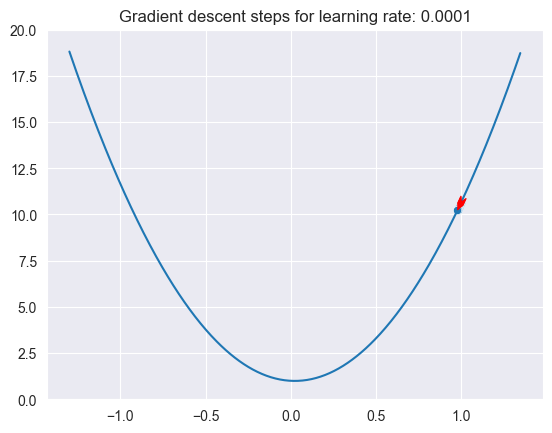

In [76]:
gradient_visualization_ten_iterations(learning_rate=learning_rates[3])

# Exercise 5

## (a)

In [86]:
# Dependencies
from sklearn.linear_model import LinearRegression

In [87]:
def linear_regression(X):
    # Split the data
    t = X[:, 0]
    X = X[:, 1:]

    # Defining the model
    linear_model = LinearRegression().fit(X=X, y=t)
    
    # combined w
    w = np.concatenate([[linear_model.intercept_], linear_model.coef_])

    return w, linear_model

## (b)

In [94]:
# Defining input data
Xb = occupancy_standardized[:, :2]
w, relative_humidity_model = linear_regression(Xb)

# Indexing parameters
w0 = w[0]
w1 = w[1]

print(f"Retrieved parameters")
print(f"w0: {w0}")
print(f"w1: {w1}")

Retrieved parameters
w0: -6.39653177883233e-14
w1: -0.009387889127335881


## (C)

In [97]:
# Defining input data
Xc = occupancy_standardized[:, :4]
w, three_features_model = linear_regression(Xc)

# Indexing parameters
w0 = w[0]
wi = w[1:]

print(f"Retrieved parameters")
print(f"wi: {w}")

Retrieved parameters
wi: [-6.72114931e-14 -3.60106669e-01  4.14081700e-01  5.44926299e-01]


# Exercise 6

In [90]:
def rmse(y, y_pred):
    diff = np.square(y - y_pred)
    rmse = np.sqrt(np.mean(diff))
    return rmse

In [98]:
# standardize test data
occupancy_standardized_test = standardize(X_occu_test)

In [99]:
# Indice data
X_relative_humidity_test = occupancy_standardized_test[:, [1]]
y_relative_humidity_test = occupancy_standardized_test[:, 0]

# Make prediction
y_pred_relative_humidity = relative_humidity_model.predict(X_relative_humidity_test)

# Compare
rmse_relative_humidity_result = rmse(y=y_relative_humidity_test, y_pred=y_pred_relative_humidity)

# Print result
print("RMSE result using one feature; relative_humidity")
print(rmse_relative_humidity_result)

RMSE result using one feature; relative_humidity
0.996932667076191


In [100]:
# Indice data
X_three_features_test = occupancy_standardized_test[:, 1:4]
y_three_features_test = occupancy_standardized_test[:, 0]

# Make predictions
y_pred_three_features = three_features_model.predict(X_three_features_test)

# Compare
rmse_three_features_result = rmse(y=y_three_features_test, y_pred=y_pred_three_features)

# Print result
print("RMSE result using three features; relative_humidity, light, CO2")
print(rmse_three_features_result)

RMSE result using three features; relative_humidity, light, CO2
0.6754656044977823
